## Тестирование статистических гипотез с помощью вычислительного эксперимента
### Анализ данных? Каких?
Данные в виде таблицы. Колонки - переменные. Строки - наблюдения.

**Data source:** https://www.kaggle.com/datasets/spscientist/students-performance-in-exams.

**Columns:**
- `gender` (binary variable);
- `race/ethnicity` (categorical variable);
- `parental level of education` (categorical variable, student's parents' level of education);
- `lunch` (categorical variable, quality of student's lunch);
- `test preparation course` (categorical variable, whether student managed to complete preparation course for the test);
- `math score` (numeric variable, score for Math test);
- `reading score` (numeric variable, score for Reading part);
- `writing score` (numeric variable, score for Writing part).


In [1]:
import pandas as pd
import numpy as np
from scipy import stats

data = pd.read_csv('data/StudentsPerformance.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [2]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Изучаем взаимодействие переменных

<table style="border: 1px solid black; border-collapse: collapse;">
    <tr>
        <td style="border: 1px solid black; border-collapse: collapse;"></td>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center; background-color: white"><b>числовая</b></td>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center"><b>упорядоченная</b></td>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center"><b>категориальная</b></td>
    </tr>
    <tr>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center"><b>числовая</b></td>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center">корреляция</td>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center">ранговая<br>корреляция</td>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center">разница<br>по группам</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center"><b>упорядоченная</b></td>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center">ранговая<br>корреляция</td>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center">ранговая<br>корреляция</td>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center">таблица<br>сопряженности</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center"><b>категориальная</b></td>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center">разница<br>по группам</td>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center">таблица<br>сопряженности</td>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center">таблица<br>сопряженности</td>
    </tr>
</table>

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Проверка гипотез? Зачем?
**Общий смысл**

- видим в данных какую-то закономерность (возникает гипотеза?)
- думаем, как ее измерить (начинаем проверять наше предположение)
- может ли быть, что такое значение получено случайно, и на самом деле такой связи нет? насколько это вероятно?
- для ответа требуется: 1) понять, какие вообще результаты получаются случайно и 2) проверить, "ложится" ли значение в результаты, получаемые случайно
- если укладывается - закономерность случайна, нет - отвергаем случайность закономерности

### Тестируем разницу в средних
**Вопрос:** нужно ли хорошо питаться, чтобы хорошо писать математику?

<table style="border: 1px solid black; border-collapse: collapse;">
    <tr>
        <td style="border: 1px solid black; border-collapse: collapse;"></td>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center; background-color: white"><b>числовая</b></td>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center"><b>упорядоченная</b></td>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center"><b>категориальная</b></td>
    </tr>
    <tr>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center"><b>числовая</b></td>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center">корреляция</td>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center">ранговая<br>корреляция</td>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center; background-color: darkred;">разница<br>по группам</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center"><b>упорядоченная</b></td>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center">ранговая<br>корреляция</td>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center">ранговая<br>корреляция</td>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center">таблица<br>сопряженности</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center"><b>категориальная</b></td>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center">разница<br>по группам</td>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center">таблица<br>сопряженности</td>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center">таблица<br>сопряженности</td>
    </tr>
</table>

**Метрика:** разница в средних баллах по математике тех, кто хорошо питался, и тех, кто не очень.

А какая вообще могла бы быть разница по чисто случайным причинам при условии, что ее на самом деле нет? Самое главное - правильно симулировать случайность!

In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# разделим людей на группы
lunch_norm = data.loc[data['lunch'] == 'standard', 'math score'].values
lunch_bad = data.loc[data['lunch'] == 'free/reduced', 'math score'].values

In [8]:
lunch_bad

array([ 47,  40,  64,  38,  18,  46,  54,  65,  74,  73,  56,  50,  75,
        57,  55,  59,  50,  57,  77,  71,  33,   0,  79,  39,  62,  45,
        61,  58,  41,  61,  44,  49,  50,  42,  76,  27,  43,  78,  58,
        52,  77,  75,  63,  53,  87,  74,  59,  42,  22,  73, 100,  66,
        60,  66,  82,  75,  49,  53,  58,  67,  43,  46,  52,  62,  46,
        45,  65,  48,  59,  55,  45,  78,  65,  74,  58,  80,  35,  42,
        60,  83,  34,  66,  55,  45,  68,  63,  73,  71,  64,  65,  64,
        44,  59,  71,  47,  65,  73,  73,  70,  88,  78,  67,  40,  90,
        81,  56,  53,  49,  68,  56,  67,  43,  41,  28,  61,  24,  35,
        58,  75,  42,  59,  27,  49,  61,  44,  45,  46,  85,  79,  38,
        38,  57,  73,  48,  50,  49,  52,  51,  57,  82,  47,  41,  62,
        69,  65,  68,  64,  47,  50,  75,  59,  79,  69,  64,  65,  65,
        53,  37,  53,  53,  54,  77,  26,  72,  77,  52,  68,  61,  60,
        79,  65,  59,  63,  40,  55,  62,  77,  67,  54,  56,  3

In [9]:
# посчитаем разницу в средних
real_diff = lunch_norm.mean() - lunch_bad.mean()
real_diff

11.112981766568396

In [17]:
# симулируем распределение случайной разницы
def simulate(vector1, vector2):
    concat = np.concatenate((vector1, vector2))
    permuted = np.random.permutation(concat)
    vector1_new, vector2_new = permuted[:vector1.size], permuted[vector2.size:]
    simulated_diff = vector1_new.mean() - vector2_new.mean()
    
    return simulated_diff

In [44]:
simulate(lunch_norm, lunch_bad)

-0.058914728682168516

In [45]:
N = 100000

simulated_diffs = np.array([simulate(lunch_norm, lunch_bad) for i in range(N)])

In [46]:
simulated_diffs.size

100000

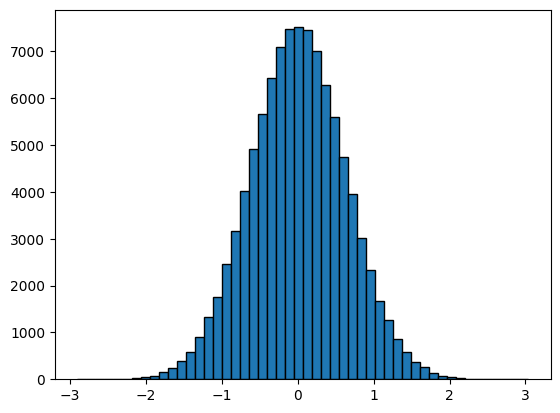

In [47]:
# взглянем на распределение
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.hist(simulated_diffs, bins=50, edgecolor='black');

In [48]:
real_diff  # реальная разница абсолютно не укладывается в теоретическое распределение случайной разницы, поэтому делаем вывод, что разница неслучайна

11.112981766568396

In [49]:
hypothetic_real_diff = 2

In [51]:
(simulated_diffs >= hypothetic_real_diff).mean()

0.00071

In [53]:
(simulated_diffs >= real_diff).mean()

0.0

In [ ]:
# 0.05

In [52]:
stats.ttest_ind(
    lunch_norm,
    lunch_bad,
    equal_var=False
)

TtestResult(statistic=11.484100293169273, pvalue=5.5395849439653935e-28, df=667.5029427147624)

Такая же логика лежит в основе статистических тестов (например, t-критерий Стъюдента).

<u>Двухвыборочный t-test: сравнение средних</u>
![](https://cdn1.qualitygurus.com/wp-content/uploads/2022/12/Two-sample-t-test-formulas.png?lossy=1&ssl=1)

### Тестируем коэффициент корреляции
**Вопрос:** связаны ли успеваемость по математике и чтению?

<table style="border: 1px solid black; border-collapse: collapse;">
    <tr>
        <td style="border: 1px solid black; border-collapse: collapse;"></td>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center; background-color: white"><b>числовая</b></td>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center"><b>упорядоченная</b></td>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center"><b>категориальная</b></td>
    </tr>
    <tr>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center"><b>числовая</b></td>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center; background-color: darkred;">корреляция</td>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center">ранговая<br>корреляция</td>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center">разница<br>по группам</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center"><b>упорядоченная</b></td>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center">ранговая<br>корреляция</td>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center">ранговая<br>корреляция</td>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center">таблица<br>сопряженности</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center"><b>категориальная</b></td>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center">разница<br>по группам</td>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center">таблица<br>сопряженности</td>
        <td style="border: 1px solid black; border-collapse: collapse; text-align: center">таблица<br>сопряженности</td>
    </tr>
</table>

**Метрика:** коэффициент корреляции.

![](https://i.pinimg.com/originals/bb/cb/ec/bbcbec1321afe19b40e7fa663c3f8125.jpg)

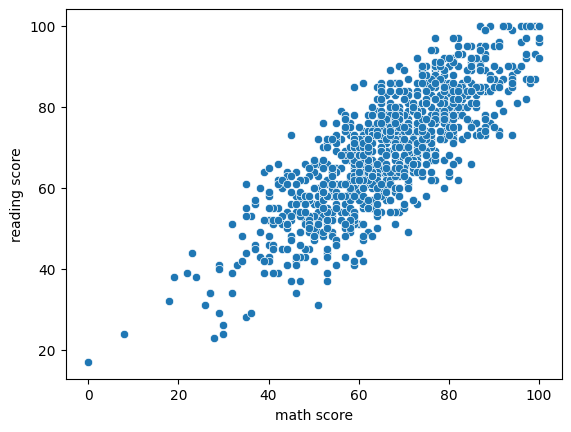

In [54]:
import seaborn as sns

math_score = data['math score'].values
reading_score = data['reading score'].values

sns.scatterplot(x='math score', y='reading score', data=data);

In [57]:
coef_real = np.corrcoef(math_score, reading_score)[0, 1]
coef_real

0.8175796636720544

In [85]:
np.corrcoef(np.random.permutation(math_score), reading_score)[0, 1]

-0.024819040760559134

In [86]:
def simulate(vector1, vector2):
    vector1_permuted = np.random.permutation(vector1)
    coef = np.corrcoef(vector1_permuted, vector2)[0, 1]
    
    return coef

In [87]:
N = 100000

simulated_coefs = np.array([simulate(math_score, reading_score) for i in range(N)])

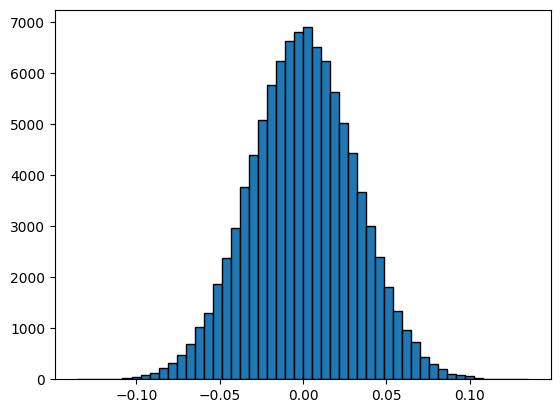

In [88]:
fig, ax = plt.subplots()
ax.hist(simulated_coefs, bins=50, edgecolor='black');

In [89]:
coef_real  # реальная корреляция абсолютно не укладывается в теоретическое распределение случайной разницы, поэтому делаем вывод, что корреляция неслучайна и реально существует

0.8175796636720544

In [90]:
stats.pearsonr(math_score, reading_score)

PearsonRResult(statistic=0.8175796636720556, pvalue=1.7877531098993485e-241)